# Lab Assignment 3

## Sam Dauncey, s2028017

We consider the system $$\frac{dx}{dt}=x(y-1),\quad \frac{dy}{dt}=4-y^2-x^2.$$

## Task 1 (2 marks)

Use `SymPy` to find the critical points of the system.

In [1]:
import sympy as sym
sym.init_printing()
from IPython.display import display_latex

In [100]:
# Define sympy symbols.
t = sym.symbols("t")
x = sym.Function("x")
y = sym.Function("y")

# Use these symbols to define the expressions for x' and y' given above.
x_prime = x(t)*(y(t) - 1)
y_prime = 4 - y(t)**2 - x(t)**2

deq_x = sym.Eq(x(t).diff(t), x_prime)
deq_y = sym.Eq(y(t).diff(t), y_prime)

# Symbolically solve for when (x', y') = (0, 0)
crit_point_dicts = sym.solve([x_prime, y_prime])

# Extract the critical points from the dictionaries given by sympy.
crit_points = [(point[x(t)], point[y(t)]) for point in crit_point_dicts]
crit_points

## Task 2 (4 marks)

Give your implementation of the `linearise` function from Lab 3.

Use this to find linear approximations of the system around the critical points with $x \geq 0$ and $y \geq 0$. Use the output to classify these critical points (use markdown cells and proper reasoning to explain the type of each critical point).

In [104]:
# Define some variables to use in our linear system.
u = sym.Function("u")
v = sym.Function("v")

def lin_matrix(eqs, crit_point):
    """Returns the jacobian F(x, y) = (x', y') evaluated at the given critical point"""
    # Unpack the expressions for x' and y' and use them to calculate the Jacobian.
    eq1, eq2 = eqs
    FG = sym.Matrix([eq1.rhs, eq2.rhs])
    matJ = FG.jacobian([x(t), y(t)])
    
    # Evaluate the Jacobian at the given critical point.
    x0, y0 = crit_point
    lin_mat = matJ.subs({x(t):x0, y(t):y0})
    return lin_mat

def linearise(eqs, crit_point):
    """Returns a list of equations for the linearised system of eqs evaluated at the given critical point"""
    # Get the jacobian, J, at our critical point
    lin_mat = lin_matrix(eqs, crit_point)
    
    # Construct the system (u', v') = J (u, v) component-wise and return.
    uv_rhs = lin_mat * sym.Matrix([u(t),v(t)])
    u_eq = sym.Eq(u(t).diff(t), uv_rhs[0])
    v_eq = sym.Eq(v(t).diff(t), uv_rhs[1])
    return [u_eq, v_eq]


# Print info about the linear system at each of the critical points.
for point in crit_points:
    
    # If the x and y coords are non-negative, print information about the point.
    x0, y0 = point    
    if x0 >= 0 and y0 >= 0:
        print("critical point:")
        display_latex((x0, y0))
        
        # Use lin_matrix() to get the matrix and eigenvalues of the linearised system
        linearised_matrix = lin_matrix([deq_x, deq_y], point)
        print("linearised matrix, eigenvalues")
        display_latex(linearised_matrix)
        display_latex(list(linearised_matrix.eigenvals().keys()))
        
        # Use linearise() to get a printable version of the linear system
        print("full linearised system:")
        display_latex(linearise([deq_x, deq_y], point))
        print()
        print()

critical point:


linearised matrix, eigenvalues


full linearised system:




critical point:


linearised matrix, eigenvalues


full linearised system:


We can see here that the point $(2, 0)$ will be unstable as the linearised system has a positive eigenvalue (namely $1$). In contrast, the eigenvalues for the linearised system at the critical point $(\sqrt{3}, 1)$ both have negative real parts so this critical point will be stable.

## Task 3 (4 marks)

Produce a phase portrait of the system, with trajectories showing the behaviour around all the critical points. A few trajectories are enough to show this behaviour. Use properly-sized arrows to diplay the vector field (the RHS of the ODE). There are some marks allocated to the quality of your figure in this part. Try to keep it illustrative yet not too cluttered.

NameError: name 'crit_points' is not defined

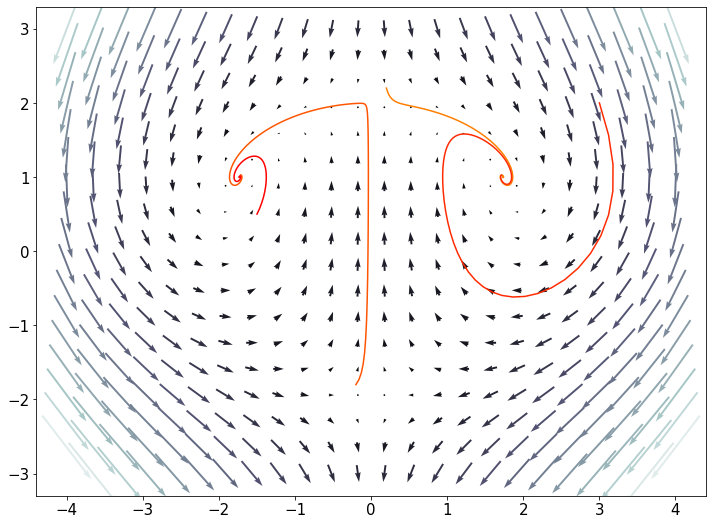

In [2]:

import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Get figure and axes
fig, ax = plt.subplots(figsize=(12, 9))


# Define x and y derivatives (t variable for use with odeint)
def vector_field(xy, t):
    X, Y = xy
    return (X*(Y - 1), 4 - Y**2 - X**2)

# Get arrays for all the points with  -4 < x < 4, -3 < y < 3
X, Y = np.mgrid[-4:4:24j, -3:3: 18j]

# Evaluate the vector field and length of each vector at each point
X_prime, Y_prime = vector_field((X, Y), None)
Magnitude = np.hypot(X_prime, Y_prime)

# Plot arrows which are faded if they have large magnitute
ax.quiver(X, Y, X_prime, Y_prime, Magnitude,
          scale=200, pivot = 'mid', cmap = plt.cm.bone)

# Pick some initial conditions for phase portraits
ics  = [[0.2, 2.2], [-0.2, -1.8], [3, 2], [-1.5, 0.5]]
durations = [[0, 10], [0, 8], [0, 5], [0, 5]]

vcolors = plt.cm.autumn_r(np.linspace(0.5, 1., len(ics)))  # colors for each trajectory

# plot trajectories
for time_span, ic, color in zip(durations, ics, vcolors):
    t = np.linspace(*time_span, 100)
    sol = odeint(vector_field, ic, t)
    x_sol, y_sol = sol.T
    ax.plot(x_sol, y_sol, color=color, label=f"$(x_0, y_0)$ = {ic}")


def split_coords(tuple_list):
    """Helper function which takes [(a, b), (c, d), (e, f) ... ] and returns [[a, c, e .. ], [b, d, f ...]]"""
    return np.array(tuple_list).T

# Plot black and blue points for the critical points and initial conditions respectivelyl
ax.scatter(*split_coords(crit_points), color = "k", label="critical points")
ax.scatter(*split_coords(ics), color='b', label="initial conditions")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.xlim(-4, 4)
plt.ylim(-3, 3)

plt.show()